In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

/Users/andyxie/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# DUMMY DATA

In [2]:
X = np.linspace(-1,1,300).reshape((-1,1)).astype(np.float32) # 300 numbers between -1 ~ 1b
noise = np.random.normal(0, 0.05, X.shape)
y = np.square(X) - 0.5
X.shape, y.shape

((300, 1), (300, 1))

In [3]:
y = np.square(X)

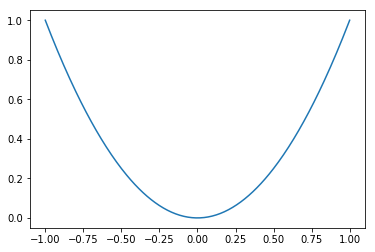

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X, y)

# MODEL

In [5]:
def add_layer(X, in_size, out_size, activation_function=None):  
    with tf.name_scope("Layer"):
        with tf.name_scope("W"):
            W = tf.Variable(tf.random_normal([in_size, out_size]), name="w") 
        with tf.name_scope("b"):
            b = tf.Variable(tf.zeros([1,out_size]) + 0.1, name="b")
        with tf.name_scope("MatMul"):
            y = tf.matmul(X,W) + b
        if activation_function is None:
            return y
        else:
            return activation_function(y)

In [6]:
with tf.name_scope("Inputs"):
    ys = tf.placeholder(tf.float32,[None, 1], name = "Input_X")
    xs = tf.placeholder(tf.float32, [None, 1], name = "Input_Y")

l_1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
ys_ = add_layer(l_1, 10, 1)

with tf.name_scope("Loss"):
    loss = tf.reduce_mean(
        tf.reduce_sum(tf.square(ys - ys_), reduction_indices=[1]))
    
with tf.name_scope("GD"):
    step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    


# Session

In [7]:
N_STEP = 1000
y_predictions = []

with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(N_STEP):
        sess.run(step, feed_dict={xs: X, ys: y})
        if i%50 == 0:
            loss_current = sess.run(loss, feed_dict={xs: X, ys: y})
            print(loss_current)
        if i%50 ==0:
            y_prediction = sess.run(ys_, feed_dict={xs:X})
            y_predictions.append(y_prediction)
    writer = tf.summary.FileWriter("logs/", sess.graph)
y_predictions = np.array(y_predictions)    

0.0236886
0.00649013
0.00517757
0.00446294
0.00397676
0.00362153
0.00335262
0.00313462
0.00295471
0.00279645
0.00265429
0.00252242
0.00239836
0.00228064
0.00216607
0.00205725
0.00195529
0.00185915
0.00176943
0.00168716


# TensorBoard
Use:
tensorboard --logdir='logs/'

![tensorboard](../img/tensorboard.png)